In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip uninstall jax jaxlib

Found existing installation: jax 0.4.13
Uninstalling jax-0.4.13:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/jax-0.4.13.dist-info/*
    /usr/local/lib/python3.11/dist-packages/jax/*
Proceed (Y/n)? y
  Successfully uninstalled jax-0.4.13
Found existing installation: jaxlib 0.4.13
Uninstalling jaxlib-0.4.13:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/jaxlib-0.4.13.dist-info/*
    /usr/local/lib/python3.11/dist-packages/jaxlib/*
Proceed (Y/n)? y
  Successfully uninstalled jaxlib-0.4.13


In [ ]:
!pip install nltk contractions
!pip install wordcloud
!pip install tensorflow
!pip install keras

!pip install numpy==1.23.5
!pip install gensim
!pip install jax==0.4.13
!pip install jaxlib==0.4.13

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 37.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
orbax-checkpoint 0.11.13 requires jax>=0.5.0, which is not installed.
optax 0.2.4 requires jax>=0.4.27, which is not installed.
optax 0.2.4 requires jaxlib>=0.4.27, which is not installed.
dopamine-rl 4.1.2 requires jax>=0.1.72, which is not installed.
dopamine-rl 4.1.2 requires jaxlib>=0.1.51, which is not installed.
flax 0.10.6 requires jax>=0.5.1, which is not installed.
chex 0.1.89 requires jax>=0.4.27, which is not installed.
chex 0.1.89 requires jaxlib>=0.4.27, which is not installed.
gensim 4.3.3 requir

ERROR: Operation cancelled by user
^C
^C
^C


In [ ]:
import pandas as pd
import re
import nltk
import contractions
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import class_weight

nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
file_path = '/content/drive/MyDrive/Artificial Intelligence and Machine Learning/Text Classification/Book_review.csv'

df = pd.read_csv(file_path)

In [ ]:
# Print the first 5 rows of the DataFrame to view a sample of the data
print("Sample Data:")
print(df.head())

# Print the column names of the DataFrame
print("\nColumn :")
print(df.columns)


Sample Data:
   Unnamed: 0  rating                                         reviewText  \
0           0       5  This book was the very first bookmobile book I...   
1           1       1  When I read the description for this book, I c...   
2           2       5  I just had to edit this review. This book is a...   
3           3       5  I don't normally buy 'mystery' novels because ...   
4           4       5  This isn't the kind of book I normally read, a...   

                           summary  
0                50 + years ago...  
1          Boring! Boring! Boring!  
2  Wiggleliscious/new toy ready/!!  
3                  Very good read.  
4                     Great Story!  

Column Names:
Index(['Unnamed: 0', 'rating', 'reviewText', 'summary'], dtype='object')


In [ ]:
df.head()

,Unnamed: 0,rating,reviewText,summary
0,0,5,This book was the very first bookmobile book I...,50 + years ago...
1,1,1,"When I read the description for this book, I c...",Boring! Boring! Boring!
2,2,5,I just had to edit this review. This book is a...,Wiggleliscious/new toy ready/!!
3,3,5,I don't normally buy 'mystery' novels because ...,Very good read.
4,4,5,"This isn't the kind of book I normally read, a...",Great Story!


In [ ]:
# Drop the 'Unnamed: 0' column, which is usually an unnecessary index column from CSV
df = df.drop(columns=['Unnamed: 0'])


In [ ]:
df.head()

,rating,reviewText,summary
0,5,This book was the very first bookmobile book I...,50 + years ago...
1,1,"When I read the description for this book, I c...",Boring! Boring! Boring!
2,5,I just had to edit this review. This book is a...,Wiggleliscious/new toy ready/!!
3,5,I don't normally buy 'mystery' novels because ...,Very good read.
4,5,"This isn't the kind of book I normally read, a...",Great Story!


In [ ]:
# Combine 'summary' and 'reviewText' columns into a single 'text' column
df['text'] = df['summary'] + " " + df['reviewText']

# Define a function to convert numerical ratings into binary sentiment labels
def binary_sentiment(rating):
    if rating <= 3:
        return 'negative'  # Ratings 1 to 3 are considered negative
    elif rating >= 4:
        return 'positive'  # Ratings 4 and 5 are considered positive

# Apply the binary_sentiment function to create a new 'sentiment' column
df['sentiment'] = df['rating'].apply(binary_sentiment)


In [ ]:
df.head()

,rating,reviewText,summary,text,sentiment
0,5,This book was the very first bookmobile book I...,50 + years ago...,50 + years ago... This book was the very first...,positive
1,1,"When I read the description for this book, I c...",Boring! Boring! Boring!,Boring! Boring! Boring! When I read the descri...,negative
2,5,I just had to edit this review. This book is a...,Wiggleliscious/new toy ready/!!,Wiggleliscious/new toy ready/!! I just had to ...,positive
3,5,I don't normally buy 'mystery' novels because ...,Very good read.,Very good read. I don't normally buy 'mystery'...,positive
4,5,"This isn't the kind of book I normally read, a...",Great Story!,Great Story! This isn't the kind of book I nor...,positive


In [ ]:
# Create a binary 'label' column: 1 for positive sentiment (rating >= 4), 0 for negative (rating < 4)
df['label'] = df['rating'].apply(lambda x: 1 if x >= 4 else 0)


In [ ]:
df.head()

,rating,reviewText,summary,text,sentiment,label
0,5,This book was the very first bookmobile book I...,50 + years ago...,50 + years ago... This book was the very first...,positive,1
1,1,"When I read the description for this book, I c...",Boring! Boring! Boring!,Boring! Boring! Boring! When I read the descri...,negative,0
2,5,I just had to edit this review. This book is a...,Wiggleliscious/new toy ready/!!,Wiggleliscious/new toy ready/!! I just had to ...,positive,1
3,5,I don't normally buy 'mystery' novels because ...,Very good read.,Very good read. I don't normally buy 'mystery'...,positive,1
4,5,"This isn't the kind of book I normally read, a...",Great Story!,Great Story! This isn't the kind of book I nor...,positive,1


In [ ]:
# Keep only the 'text' and 'label' columns for model training or analysis
df = df[['text', 'label']]


In [ ]:
df.head()

,text,label
0,50 + years ago... This book was the very first...,1
1,Boring! Boring! Boring! When I read the descri...,0
2,Wiggleliscious/new toy ready/!! I just had to ...,1
3,Very good read. I don't normally buy 'mystery'...,1
4,Great Story! This isn't the kind of book I nor...,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    11998 non-null  object
 1   label   12000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 187.6+ KB


In [ ]:
df.isnull().sum()

,0
text,2
label,0


In [ ]:
df.dropna(subset=['text', 'label'], inplace=True)

In [ ]:
print(df.isnull().sum())

text     0
label    0
dtype: int64


In [ ]:
# Create a set of English stopwords to remove common, non-informative words (e.g., "the", "is", "and")
stop_words = set(stopwords.words('english'))

# Initialize the WordNet lemmatizer to reduce words to their base or dictionary form
lemmatizer


In [ ]:
# Define a function to clean and preprocess text data
def clean_text(text):
    # Expand contractions (e.g., "don't" -> "do not")
    text = contractions.fix(text)

    # Convert all characters to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # Remove mentions (@username) and hashtags (#topic)
    text = re.sub(r'@\w+|#\w+', '', text)

    # Remove all non-alphabetic characters (punctuation, numbers, symbols)
    text = re.sub(r'[^a-zA]()


In [ ]:
df['clean_text'] = df['text'].apply(clean_text)

In [ ]:
df.head()

,text,label,clean_text
0,50 + years ago... This book was the very first...,1,year ago book first bookmobile book bought sch...
1,Boring! Boring! Boring! When I read the descri...,0,boring boring boring read description book cou...
2,Wiggleliscious/new toy ready/!! I just had to ...,1,wigglelisciousnew toy ready edit review book b...
3,Very good read. I don't normally buy 'mystery'...,1,good read normally buy mystery novel like howe...
4,Great Story! This isn't the kind of book I nor...,1,great story kind book normally read although t...


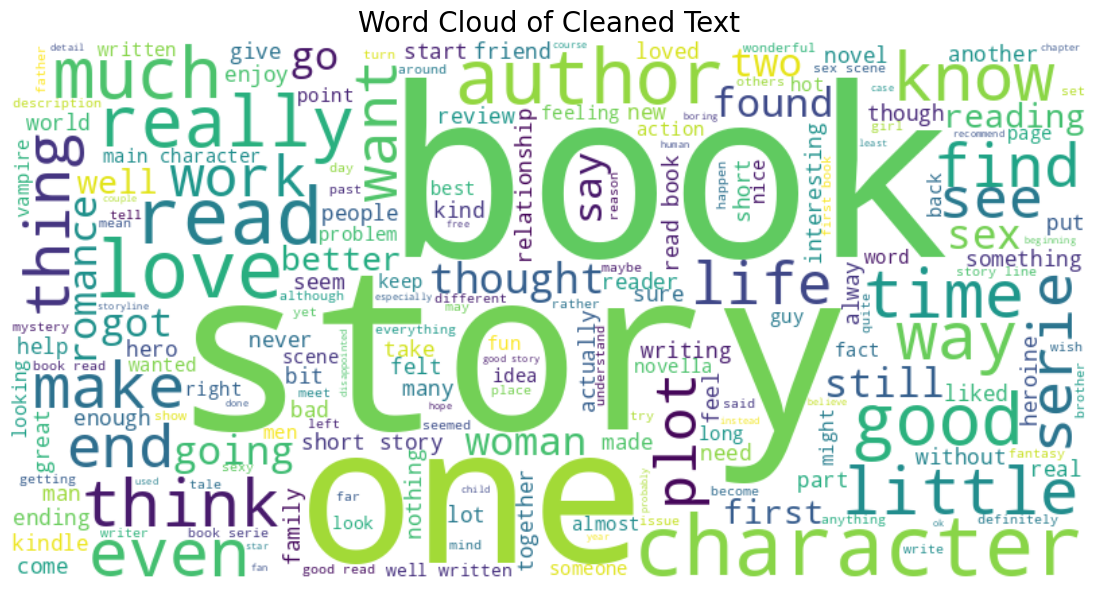

In [ ]:
# Combine all cleaned text entries into one large string for word cloud generation
text_combined = ' '.join(df['clean_text'])

# Generate a word cloud from the combined cleaned text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

# Display the word cloud using matplotlib
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')  # Smooth display
plt.axis('off')  # Hide axis ticks


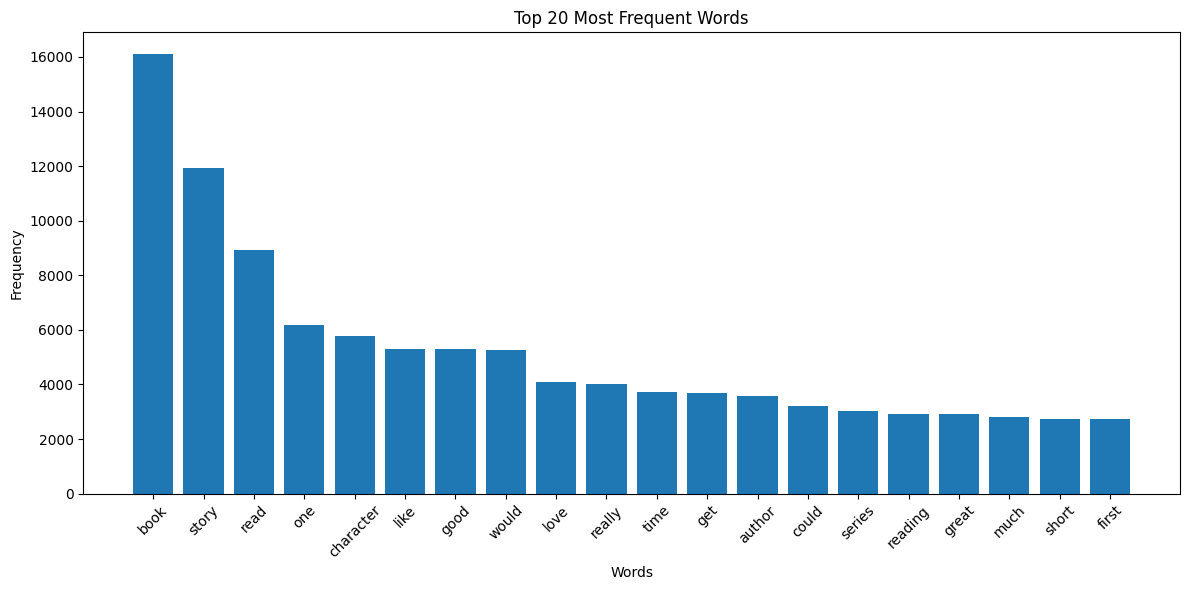

In [ ]:
# Count word frequencies from the combined cleaned text
word_freq = Counter(text_combined.split())

# Extract the 20 most common words
common_words = word_freq.most_common(20)

# Separate words and their frequencies for plotting
words, counts = zip(*common_words)

# Plot the top 20 most frequent words
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title("Top 20 Most Frequent Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.tight_layout()  # Adjust layout to avoid label overlap
plt.show()


In [ ]:
df.head()

,text,label,clean_text
0,50 + years ago... This book was the very first...,1,year ago book first bookmobile book bought sch...
1,Boring! Boring! Boring! When I read the descri...,0,boring boring boring read description book cou...
2,Wiggleliscious/new toy ready/!! I just had to ...,1,wigglelisciousnew toy ready edit review book b...
3,Very good read. I don't normally buy 'mystery'...,1,good read normally buy mystery novel like howe...
4,Great Story! This isn't the kind of book I nor...,1,great story kind book normally read although t...


In [ ]:
df = df[['clean_text', 'label']]

X = df['clean_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize tokenizer with out-of-vocabulary token
tokenizer = Tokenizer(oov_token="<OOV>")

# Fit tokenizer on training texts
tokenizer.fit_on_texts(X_train)

# Convert texts to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)


In [ ]:
# Calculate the 95th percentile sequence length
lengths = [len(seq) for seq in X_train_seq]
max_len = int(np.percentile(lengths, 95))

# Pad sequences to the same length
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')


In [ ]:
X_train_pad.shape
X_test_pad.shape

(2400, 184)

# Model Training

## RNN

In [ ]:
# Define vocabulary size, embedding dimension, and input length
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100
input_length = max_len

# Build a simple RNN model
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length))
model_rnn.add(SimpleRNN(64))
model_rnn.add(Dense(1, activation='sigmoid'))  # Binary classification

# Build model with defined input shape
model_rnn.build(input_


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model_rnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 184, 100)       │     3,674,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 64)             │        10,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,685,425 (14.06 MB)

 Trainable params: 3,685,425 (14.06 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_rnn.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [ ]:
# Compute class weights to handle class imbalance
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

# Convert to dictionary format
class_weights_dict = dict(enumerate(class_weights))
print(class_weights_dict)


{0: 1.0012518255789693, 1: 0.9987513007284079}


In [ ]:
history = model_rnn.fit(
    X_train_pad, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_pad, y_test),
    callbacks=[early_stopping],
    class_weight=class_weights_dict
)

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.4991 - loss: 0.6969 - val_accuracy: 0.5113 - val_loss: 0.6931
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.5239 - loss: 0.6744 - val_accuracy: 0.4967 - val_loss: 0.6977
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.5361 - loss: 0.6760 - val_accuracy: 0.4983 - val_loss: 0.6950
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.5188 - loss: 0.6723 - val_accuracy: 0.5029 - val_loss: 0.6956


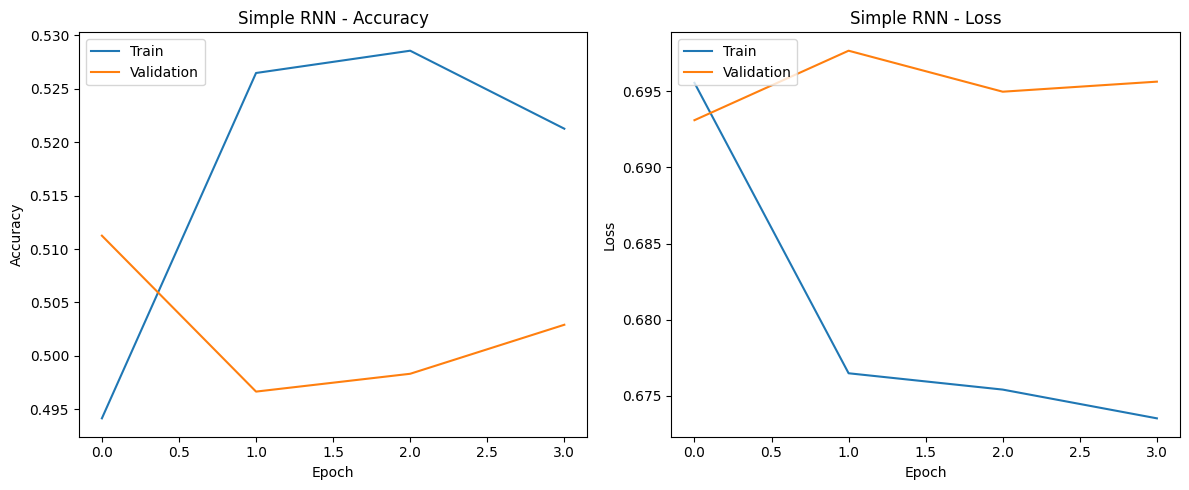

In [ ]:
# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Simple RNN - Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Simple RNN - Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


Evaluating Model 1: Simple RNN
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step

Model 1: Simple RNN Accuracy: 0.5112


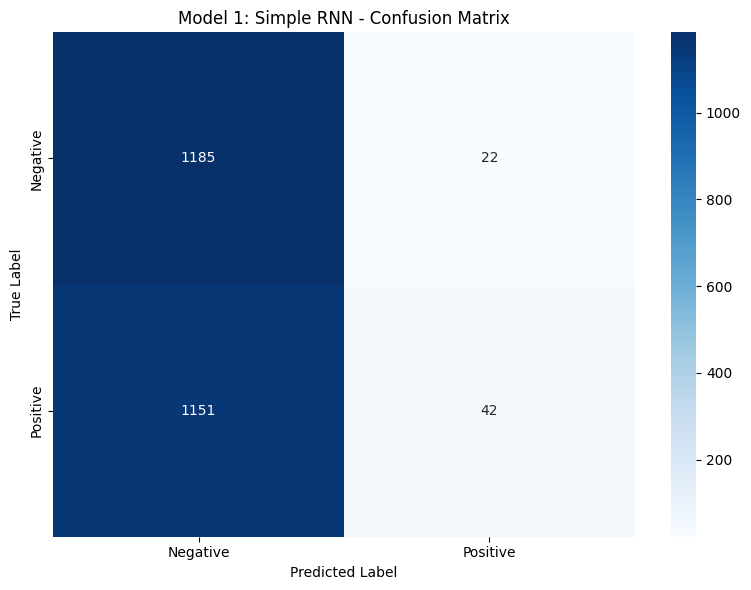


Model 1: Simple RNN Classification Report:
              precision    recall  f1-score   support

    Negative       0.51      0.98      0.67      1207
    Positive       0.66      0.04      0.07      1193

    accuracy                           0.51      2400
   macro avg       0.58      0.51      0.37      2400
weighted avg       0.58      0.51      0.37      2400



In [ ]:
def evaluate_model(model, X_test, y_test, model_name):
    # Predict probabilities
    y_pred_prob = model.predict(X_test)

    # Convert probabilities to binary predictions
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{model_name} Accuracy: {accuracy:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative', 'Positive'],  # Adjusted labels for your dataset
                yticklabels=['Negative', 'Positive'])  # Adjusted labels for your dataset
    plt.title(f'{model_name} - Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

    # Classification Report
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_test, y_pred,
                               target_names=['Negative', 'Positive']))  # Adjusted labels for your dataset

    return accuracy, y_pred

# Evaluate Simple RNN Model
print("Evaluating Model 1: Simple RNN")
acc1, pred1 = evaluate_model(model_rnn, X_test_pad, y_test, "Model 1: Simple RNN")

## Simple LSTM

In [ ]:
# Define model parameters
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100
max_length = 184

# Build a simple LSTM model
simple_lstm = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    LSTM(units=64, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Define input shape
simple_lstm.build(input_shape=(None, max_length))

# Display model summary
simple_lstm.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 184, 100)       │     3,674,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        42,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,717,105 (14.18 MB)

 Trainable params: 3,717,105 (14.18 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
simple_lstm.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [ ]:
# Compute balanced class weights based on label distribution
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

# Convert to dictionary format for model training
class_weights_dict = dict(enumerate(class_weights))
print(class_weights_dict)


{0: 1.0012518255789693, 1: 0.9987513007284079}


In [ ]:
# Train the LSTM model with class weights and early stopping
history2 = simple_lstm.fit(
    X_train_pad,         # Padded training sequences
    y_train,             # Training labels
    epochs=10,           # Number of training epochs
    batch_size=32,       # Batch size
    validation_data=(X_test_pad, y_test),  # Validation set
    class_weight=class_weights_dict,       # Handle class imbalance
    callbacks=[early_stopping]             # Stop early if no improvement
)


Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 205s 657ms/step - accuracy: 0.4918 - loss: 0.6948 - val_accuracy: 0.4967 - val_loss: 0.6937
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 202s 667ms/step - accuracy: 0.5250 - loss: 0.6924 - val_accuracy: 0.4958 - val_loss: 0.6932
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 196s 648ms/step - accuracy: 0.5261 - loss: 0.6856 - val_accuracy: 0.5075 - val_loss: 0.6941
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 190s 635ms/step - accuracy: 0.5294 - loss: 0.6657 - val_accuracy: 0.5054 - val_loss: 0.7026
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 203s 639ms/step - accuracy: 0.5204 - loss: 0.6594 - val_accuracy: 0.5063 - val_loss: 0.7127


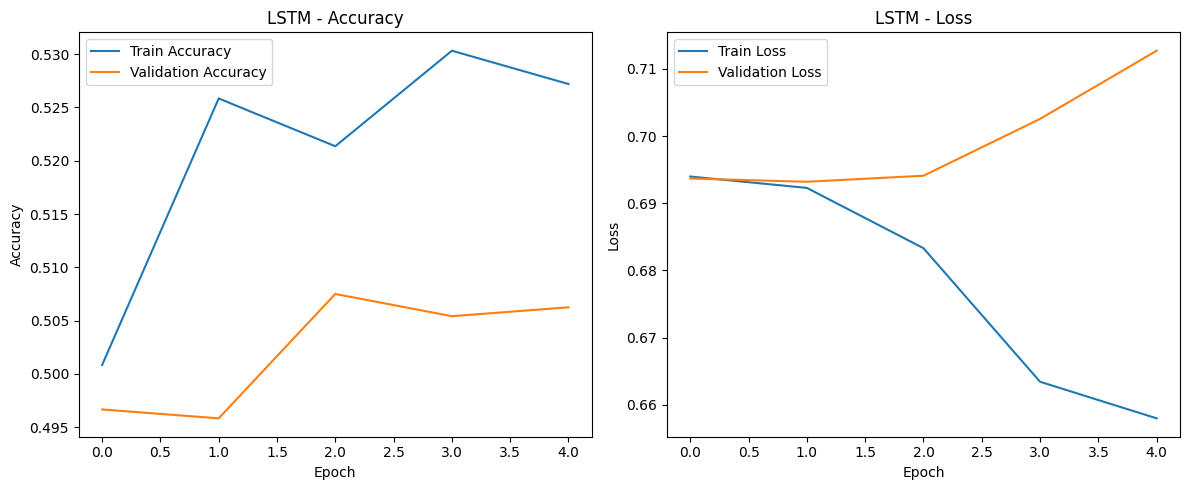

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM - Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('LSTM - Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


Evaluating Model 2: LSTM
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step

Model 2: LSTM Accuracy: 0.4958


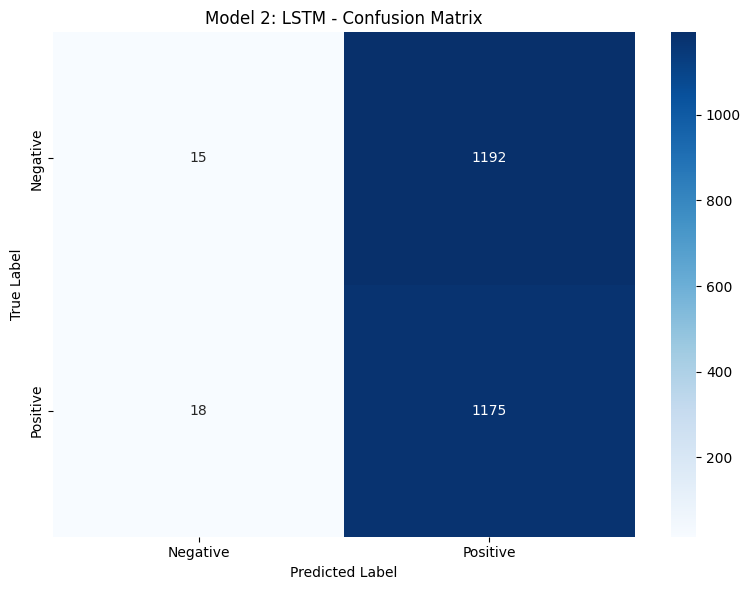


Model 2: LSTM Classification Report:
              precision    recall  f1-score   support

    Negative       0.45      0.01      0.02      1207
    Positive       0.50      0.98      0.66      1193

    accuracy                           0.50      2400
   macro avg       0.48      0.50      0.34      2400
weighted avg       0.48      0.50      0.34      2400



In [ ]:
print("\nEvaluating Model 2: LSTM")
acc2, pred2 = evaluate_model(simple_lstm, X_test_pad, y_test, "Model 2: LSTM")

## LSTM with the Word2Vec

In [ ]:
# Import Gensim's API and Word2Vec model class
import gensim.downloader as api
from gensim.models import Word2Vec

# Load pre-trained GloVe embeddings (100-dimensional)
embedding_model = api.load('glove-wiki-gigaword-100')


[==================================================] 100.0% 128.1/128.1MB downloaded


In [ ]:
import pickle

# Initialize and fit tokenizer
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

# Save tokenizer to file
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

# Prepare embedding matrix using pre-trained GloVe embeddings
vocab_size = 10000
embedding_dim = embedding_model.vector_size
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in tokenizer.word_index.items():
    if i >= vocab_size:
        continue
    if word in embedding_model:
        embedding_matrix[i] = embedding_model[word]

# Build model using GloVe embeddings
model_w2v = Sequential([
    Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        weights=[embedding_matrix],
        input_length=max_length,
        trainable=False  # Freeze embeddings
    ),
    LSTM(64),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Build model to set input shape
model_w2v.build(input_shape=(None, max_length))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
embedding_dim

100

In [ ]:
model_w2v.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
model_w2v.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 184, 100)       │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        42,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,042,305 (3.98 MB)

 Trainable params: 42,305 (165.25 KB)

 Non-trainable params: 1,000,000 (3.81 MB)

In [ ]:
X_train_pad.shape

(9598, 184)

In [ ]:
history_w2v = model_w2v.fit(
    X_train_pad, y_train,
    epochs=15,
    batch_size=64,
    validation_split=0.1,
    callbacks=[early_stopping],
    class_weight=class_weights_dict,
    verbose=1
)

Epoch 1/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5040 - loss: 0.6932 - val_accuracy: 0.5344 - val_loss: 0.6912
Epoch 2/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.5061 - loss: 0.6901 - val_accuracy: 0.4740 - val_loss: 0.6942
Epoch 3/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5002 - loss: 0.6874 - val_accuracy: 0.4771 - val_loss: 0.6917
Epoch 4/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5211 - loss: 0.6868 - val_accuracy: 0.4833 - val_loss: 0.6902
Epoch 5/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5176 - loss: 0.6861 - val_accuracy: 0.4740 - val_loss: 0.6949
Epoch 6/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5113 - loss: 0.6906 - val_accuracy: 0.4750 - val_loss: 0.6982
Epoch 7/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5072 - loss: 0.6887 - val_accuracy: 0.5323 - val_loss: 0.6915


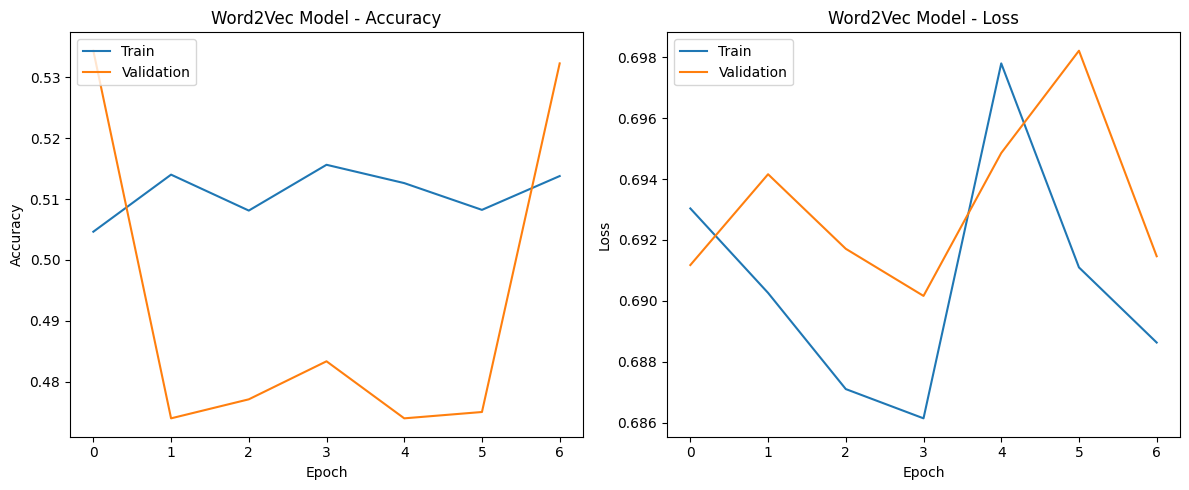

In [ ]:
# Visualize the results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_w2v.history['accuracy'])
plt.plot(history_w2v.history['val_accuracy'])
plt.title('Word2Vec Model - Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_w2v.history['loss'])
plt.plot(history_w2v.history['val_loss'])
plt.title('Word2Vec Model - Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()


Evaluating Model with Word2Vec embeddings:
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step

Model 2: LSTM Word2Vec Accuracy: 0.5021


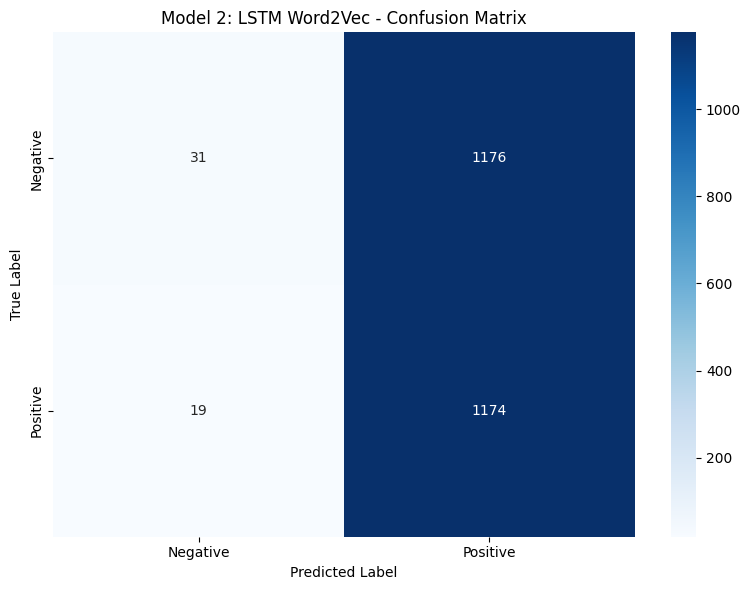


Model 2: LSTM Word2Vec Classification Report:
              precision    recall  f1-score   support

    Negative       0.62      0.03      0.05      1207
    Positive       0.50      0.98      0.66      1193

    accuracy                           0.50      2400
   macro avg       0.56      0.50      0.36      2400
weighted avg       0.56      0.50      0.35      2400



In [ ]:
# Evaluate the Word2Vec model
print("\nEvaluating Model with Word2Vec embeddings:")
acc2, pred2 = evaluate_model(model_w2v, X_test_pad, y_test, "Model 2: LSTM Word2Vec")

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 129.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.2 MB/s eta 0:00:00


In [ ]:
import gradio as gr
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model

# Load the saved tokenizer
with open("tokenizer.pkl", "rb") as f:
    tokenizer = pickle.load(f)

# Use the pre-trained Word2Vec + LSTM model
model = model_w2v

# Define the maximum sequence length for padding
max_length = 50

# Define the prediction function
def predict_review_sentiment(review):
    sequence = tokenizer.texts_to_sequences([review])
    padded = pad_sequences(sequence, maxlen=max_length, padding='post', truncating='post')
    prediction = model.predict(padded)[0][0]
    label = int(prediction > 0.5)
    sentiment = "Positive" if label == 1 else "Negative"
    return f"{sentiment} Review (Predicted: {label})"

# Set up the Gradio interface
interface = gr.Interface(
    fn=predict_review_sentiment,
    inputs=gr.Textbox(lines=4, placeholder="Enter your book review here..."),
    outputs="text",
    title="📚 Book Review Sentiment Predictor",
    description="Predict whether a book review is positive or negative using an LSTM model trained on labeled data (0 = Negative, 1 = Positive)."
)

# Launch the interface
interface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://250583bd0e2d66197d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
